# Web Scraping Lab 

In [ ]:
# pip install requests
# pip install bs4

In [1]:
# importing 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# for page requests
import requests

# header is how you appear to server 
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
# url for jewerly in DC on craigslist 
url = 'https://washingtondc.craigslist.org/search/jwa?purveyor=owner#search=1~gallery~0~0'
# requesting the page
raw = requests.get(url,headers=header) 

In [2]:
# using beautiful soup to parse the url
from bs4 import BeautifulSoup as soup 
bs = soup(raw.content,'html.parser') 
listings = bs.find_all(class_="cl-static-search-result")

In [3]:
# getting info from the page 
import re 

# list of types of jewelry
types = ['bracelet', 'ring', 'earrings', 'brooch', 'jewelry box', 'watch', 'band', 'necklace', ' pendant']

# specific gender pieces 
genders = ['men', "women", 'unisex']

# save listings in this object
data = [] 
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # split title string to get type 
    words = title.split()

    # pull types from the title
    hits = [word for word in types if word in title] 
    # if length of type is 0, put other
    if len(hits) == 0:
        type = 'other'
    # else, put the type     
    else:
        type = hits[0]
        
    # pull gender specifications from the title
    gender_hits = [word for word in genders if re.search(rf"\b{word}\b", title)]
    if len(gender_hits) == 0:
        gender = 'unisex'
    else:
        gender = gender_hits[0]


    # put everything together
    data.append({'title':title,'price':price,'type':type, 'gender specification':gender, 'link':link})

In [4]:
# putting it into a dataframe
df = pd.DataFrame.from_dict(data)
# "cleaning" the price column
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

# print out number of rows/listings and columns
print(df.shape)

# saving data in case
df.to_csv('C:/Users/ilian/OneDrive/Desktop/DS 3021/hw data/web_scraping_data.csv')
df.head(10)

(355, 5)


,title,price,type,gender specification,link
0,casio baby g shock,35,other,unisex,https://washingtondc.craigslist.org/mld/jwl/d/...
1,tiffany t wire ring in 18k rose gold,750,ring,unisex,https://washingtondc.craigslist.org/nva/jwl/d/...
2,"fs: necklace, bracelet, earring set",27,bracelet,unisex,https://washingtondc.craigslist.org/nva/jwl/d/...
3,tiffany co sterling silver necklace,100,necklace,unisex,https://washingtondc.craigslist.org/mld/jwl/d/...
4,men’s swiss watch,450,watch,men,https://washingtondc.craigslist.org/mld/jwl/d/...
5,gold pearl earrings,800,ring,unisex,https://washingtondc.craigslist.org/mld/jwl/d/...
6,movado necklace and earings,2950,ring,unisex,https://washingtondc.craigslist.org/nva/jwl/d/...
7,men’s swiss watch,360,watch,men,https://washingtondc.craigslist.org/mld/jwl/d/...
8,new watch,360,watch,unisex,https://washingtondc.craigslist.org/mld/jwl/d/...
9,men’s swiss watch,450,watch,men,https://washingtondc.craigslist.org/mld/jwl/d/...


### Basic Analysis

In [5]:
# basic analysis for price column
print("Price: \n" , df['price'].describe())

# looking at the prices, sorted by gender
print("\nPrice, grouped by Gender Specification:")
print(df.loc[:,['price', 'gender specification']].groupby('gender specification').describe())

# looking at the prices, sorted by type
print("\nPrice, grouped by Type:")
df.loc[:,['price', 'type']].groupby('type').describe()

Price: 
 count      355.000000
mean       774.219718
std       3113.247680
min          0.000000
25%         15.000000
50%         50.000000
75%        294.500000
max      40000.000000
Name: price, dtype: float64

Price, grouped by Gender Specification:
                      price                                              \
                      count        mean          std   min   25%    50%   
gender specification                                                      
men                    53.0  298.018868   411.625927  20.0  45.0  250.0   
unisex                291.0  888.378007  3424.378811   0.0  10.0   40.0   
women                  11.0   48.636364    42.313763   5.0  25.0   35.0   

                                      
                        75%      max  
gender specification                  
men                   360.0   3000.0  
unisex                197.5  40000.0  
women                  52.5    130.0  

Price, grouped by Type:


price                                                          \
             count         mean          std    min     25%    50%     75%   
type                                                                         
 pendant       8.0   237.500000   269.457126    5.0   15.00  192.5   320.0   
band           2.0   175.000000    35.355339  150.0  162.50  175.0   187.5   
bracelet      30.0   274.233333   738.494446    1.0   11.25   50.0   100.0   
brooch         3.0    31.666667    15.275252   15.0   25.00   35.0    40.0   
jewelry box    7.0    35.000000    42.229532    5.0   12.50   20.0    35.0   
necklace      61.0    46.704918   104.215537    0.0   10.00   10.0    30.0   
other         93.0  2118.526882  5546.320381    0.0   12.00   40.0  1997.0   
ring          41.0   328.804878   733.265887    0.0   20.00   50.0   200.0   
watch        110.0   460.709091  1732.606131    0.0   45.00  150.0   360.0   

                      
                 max  
type                  
 pendant       800.0  
band           200.0  
bracelet      3590.0  
brooch          45.0  
jewelry box    125.0  
necklace       600.0  
other        40000.0  
ring          3500.0  
watch        16990.0

In [6]:
# basic analysis for type column
print("\nType: \n" , df['type'].describe())

# looking at the Type, grouped by Price
print("\nType, grouped by Price:")
df.loc[:,['type', 'price']].groupby('price').describe()



Type: 
 count       355
unique        9
top       watch
freq        110
Name: type, dtype: object

Type, grouped by Price:


type                      
      count unique       top freq
price                            
0        11      4     other    8
1         1      1  bracelet    1
4         3      2  necklace    2
5        14      7     other    6
6         2      2  necklace    1
...     ...    ...       ...  ...
12000     1      1     other    1
13950     1      1     other    1
16990     1      1     watch    1
25000     1      1     other    1
40000     1      1     other    1

[99 rows x 4 columns]

In [7]:
# basic analysis for gender column
print("Gender: \n" , df['gender specification'].describe())

Gender: 
 count        355
unique         3
top       unisex
freq         291
Name: gender specification, dtype: object


### Plots

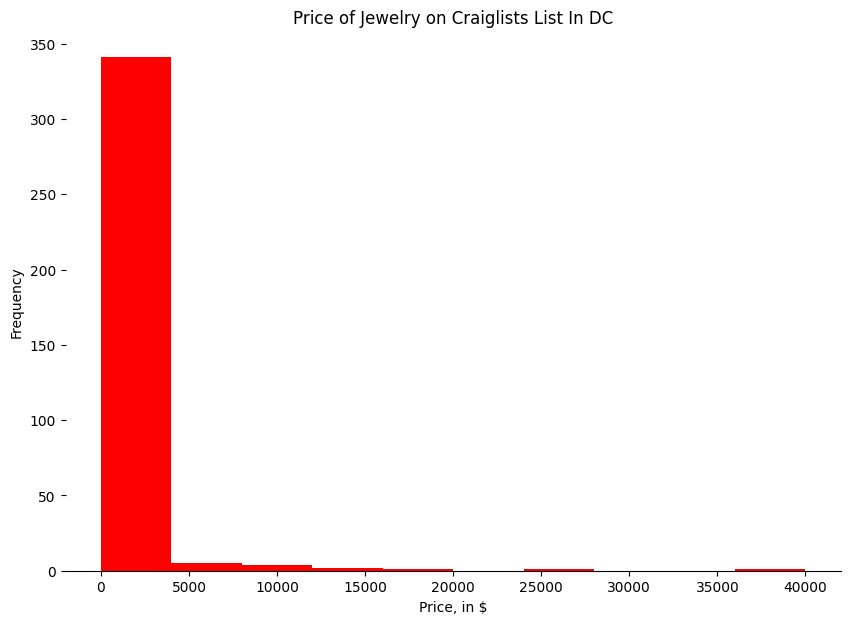

In [8]:
# histogram for price distribution
plt.figure(figsize=(10, 7))

plt.hist(x=df['price'], color='red')

plt.xlabel("Price, in $")
plt.ylabel("Frequency")
plt.title("Price of Jewelry on Craiglists List In DC")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

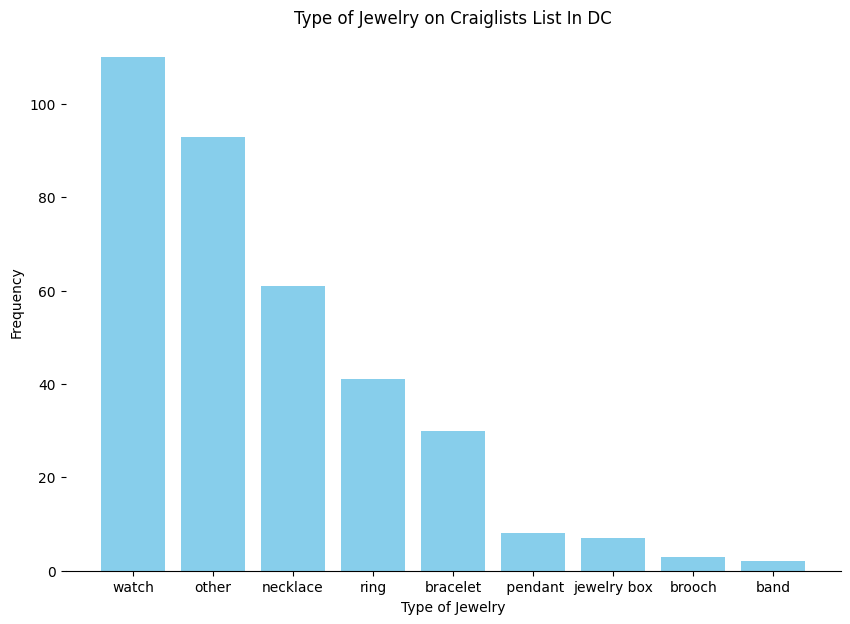

In [9]:
# bar chart for type distribution

type_freq = df['type'].value_counts()

plt.figure(figsize=(10,7))

plt.bar(x=type_freq.index, height=type_freq.values, color='skyblue')
plt.xlabel("Type of Jewelry")
plt.ylabel("Frequency")
plt.title("Type of Jewelry on Craiglists List In DC")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

Text(0.5, 1.0, 'Gender Specifications and the Price')

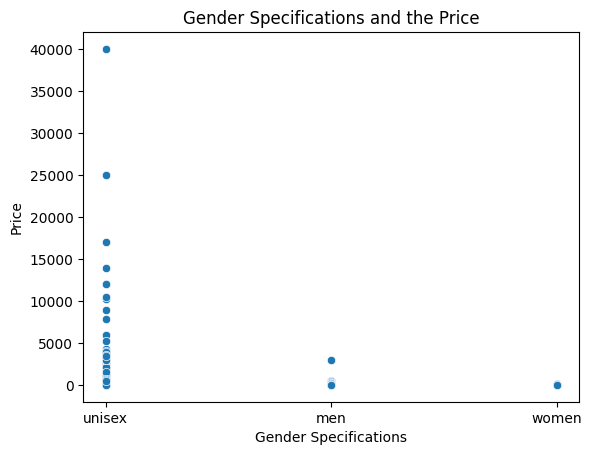

In [10]:
# scatter plot comparing gender specifications  and price
s = sns.scatterplot(data=df, x='gender specification', y='price')
s.set_xlabel("Gender Specifications")
s.set_ylabel("Price")
s.set_title("Gender Specifications and the Price")

Text(0.5, 1.0, 'Type of Jewerly and Respective Price, Colored by Gender Specification')

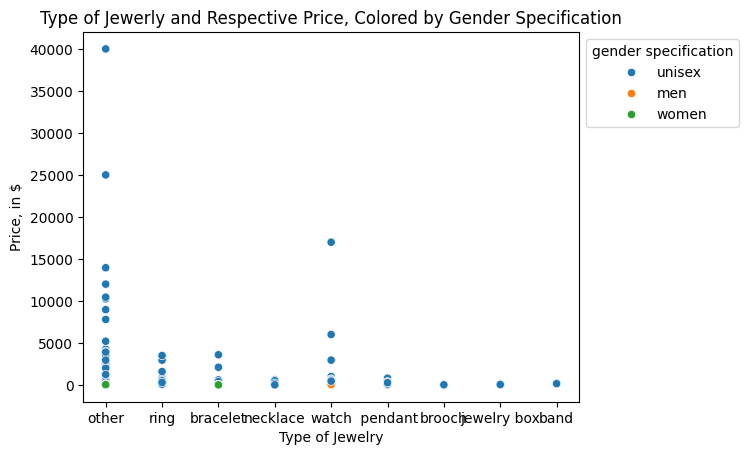

In [11]:
# scatter plot showing type and price, colored by gender
s = sns.scatterplot(data=df, x='type', y='price',hue='gender specification')
sns.move_legend(s, "upper left", bbox_to_anchor=(1, 1))
s.set_xlabel("Type of Jewelry")
s.set_ylabel("Price, in $")
s.set_title("Type of Jewerly and Respective Price, Colored by Gender Specification")

Looking at the first histogram, which plots price, in $, on the x-axis and frequency on the y-axis, we can see the main range in which most of the items are priced at. The largest bar is between $0 and $4500, with 340 items priced in this range. There are a few items that are more than that, and they are represented by very short bars. 

Looking at the second plot, a bar chart with the type of jewelry on the x-axis and its frequency on the y-axis, we can see that watches are the most common type of jewelry. The second largest item type category is the other category. The other category represents anything on this page that isn't a ring, bracelet, necklace, watch, pendant, brooch, jewelry box, or band. It makes sense that this has the highest frequency, because it is the category that could possibly encompass the widest variety of objects. 

The first scatter plot shows the price values for various items, categorized by their gender specifications. The unisex specification has the most plot points, because it has the most values in it, as well as the highest price point. 

The second scatter plot compares the price to the type of jewelry, with the different colored points indicating the gender specifications. Looking at this plot, we can analyze which type of jewelry has the most objects for each gender specifications, and the price that they fall at. We can also see this in the statistical descriptions for each category above the plots.